In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#### feature를 컬럼으로 DataFrame 생성

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0
## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
## 학습시킴
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 0)
forest = RandomForestClassifier(n_estimators=100, random_state= 0)# 디폴트 = 10
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [5]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print('Training DataSet Accuracy {:.3f}'.format(forest.score(X_train, y_train))) 
print('Test DataSet Accuracy {:.3f}'.format( forest.score(X_test, y_test)))

Training DataSet Accuracy 1.000
Test DataSet Accuracy 0.965


In [6]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=?
## max_depth=?
X = cancer.data[:,[0,1]]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

forest2 = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=5,random_state= 0)
forest2.fit(X_train, y_train)
display(forest2.score(X_train, y_train), forest2.score(X_test, y_test))

0.9413145539906104

0.8951048951048951

In [7]:
# 특성 중요도 출력하기
print('특성 중요도:\n{}'.format(forest2.feature_importances_))

특성 중요도:
[0.81031293 0.18968707]


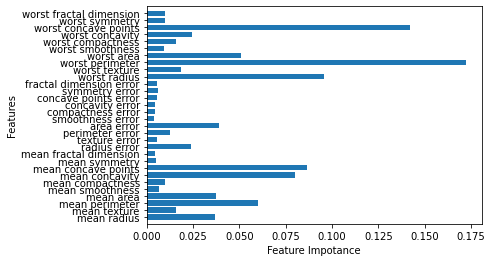

In [8]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # 30..특성의 갯수
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

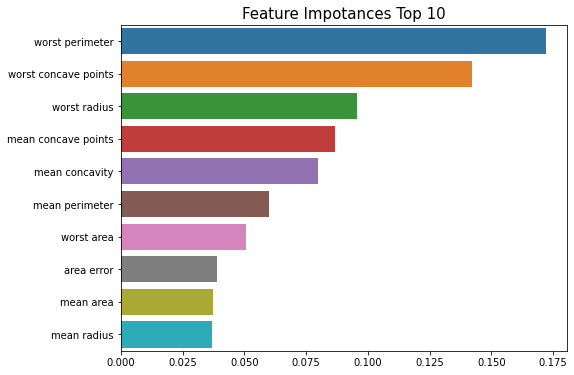

In [9]:
# 중요도 순으로 졍렬해서 시각화
import seaborn as sns
weight_values = forest.feature_importances_
weight = pd.Series(weight_values, index=cancer.feature_names)
weight_top10 = weight.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature Impotances Top 10', fontsize=15)
sns.barplot(x=weight_top10, y=weight_top10.index)
plt.show()

### Grid Search

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# 1. 하이퍼파라미터의 조합을 일단 딕셔너리 형태로 생성
param_grid = {
    "n_estimators" : [100,150,200,250],
    "max_depth" : [1,2,3,4,6,9],
    "learning_rate" : [0.1,0.01,0.001]
}

In [24]:
# 2. 우리가 적용할 모델을 생성
gmodel = GradientBoostingClassifier()

In [25]:
# 3. GridSearch를 실행 
#1) 모델과 파라미터를 가진 GridSearchCV 생성
#2) GridSearchCV 학습
grid_search = GridSearchCV(
                            gmodel,
                            param_grid = param_grid,
                            n_jobs = -1,
                            verbose=2
                        )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.2s finished


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [1, 2, 3, 4, 6, 9],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [26]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}

In [27]:
gbm = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=1,n_estimators=100)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [28]:
train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)

print("훈련세트 정확도 : {:.3f}".format(train_score))
print("테스트세트 정확도 : {:.3f}".format(test_score))

훈련세트 정확도 : 0.911
테스트세트 정확도 : 0.923


In [10]:
from sklearn.metrics import accuracy_score
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자

max_depths = [1,3,4,6,10,15]
for depth in max_depths:
    model = RandomForestClassifier(max_depth=  depth, random_state = 0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth={0} 정확도 :{1:.4f}'.format(depth, accuracy))

max_depth=1 정확도 :0.9091
max_depth=3 정확도 :0.9161
max_depth=4 정확도 :0.9021
max_depth=6 정확도 :0.8951
max_depth=10 정확도 :0.8881
max_depth=15 정확도 :0.8741
